### API Project Details

In this section, you need to try to find out answer to the given questions using the solutions you have done in Part 1 or you might need to write code to find the answers.
Find out the answer, justify them using proper plots and numbers and place them all in a pdf file and upload.
Find out answer for each question, put your answer along with the proper explanation and plots in a pdf file. Make a zip file of your pdf file and .ipynb file which is having code, and upload that.
Your report will be evaluated manually and score will be awarded accordingly.

### Dataset Collection -
Due to Zomato API Basic Plan restriction, we cannot collect enough data for analysis. To overcome this problem ‘Zomato.csv’ file is provided to analyse the data deeply and to get useful inference.
Data has been collected from the Zomato API in the form of .json files(raw data) using the following url and stored in CSV file -
https://developers.zomato.com/api/v2.1/search?entity_id=1&entity_type=city&start=1&count=20 

### Details of zomato.csv -


Restaurant Id : Unique id of every restaurant across various cities of the world

Restaurant Name : Name of the restaurant

Country Code : Country in which restaurant is located

City : City in which restaurant is located

Address : Address of the restaurant

Locality : Location in the city

Locality Verbose : Detailed description of the locality

Longitude : Longitude coordinate of the restaurant's location

Latitude : Latitude coordinate of the restaurant's location

Cuisines : Cuisines offered by the restaurant

Average Cost for two : Cost for two people in different currencies

Currency : Currency of the country

Has Table booking : yes/no

Has Online delivery : yes/ no

Is delivering : yes/ no

Switch to order menu : yes/no

Price range : range of price of food

Aggregate Rating : Average rating out of 5

Rating color : depending upon the average rating color

Rating text : text on the basis of rating of rating

Votes : Number of ratings casted by people

Country Codes :
Country Code   Country
1              India

14             Australia

30             Brazil

37             Canada

94             Indonesia

148            New Zealand

162            Phillipines

166            Qatar

184            Singapore

189            South Africa

191            Sri Lanka

208            Turkey

214            UAE

215            United Kingdom

216            United States

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics as st
import requests
import json

pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',3998)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('zomato.csv', encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### 1. The dataset is highly skewed toward the cities included in Delhi-NCR.

So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. 

Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

    1.Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.
    
    2.Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato       API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.
    
    3.Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.
    
    4.Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable     graph to explain your inference.

#### 1.Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.4

In [3]:
lst=['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad']
for i in lst:
    df.loc[df['City']==i, 'City']='Delhi-NCR'

In [4]:
df=df.loc[df.Currency=='Indian Rupees(Rs.)']

In [5]:
cities=[]
for i in df['City']:
    cities.append(i)
np_city=np.array(cities)

In [6]:
count_delhi=0
other=0
for i in np_city:
    if i=='Delhi-NCR':
        count_delhi+=1
    else:
        other+=1

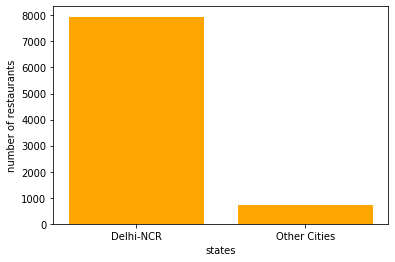

Delhi-NCR=  7947
Others=  705


In [7]:
plt.bar(['Delhi-NCR', 'Other Cities'], [count_delhi, other], color='orange')
plt.xlabel('states')
plt.ylabel('number of restaurants')
plt.show()
print('Delhi-NCR= ', count_delhi)
print('Others= ', other)

#### 2.Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India. Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [8]:
df = df.loc[df.Cuisines.notnull()]
in_delhi= []
for i in df.loc[df['City']=='Delhi-NCR', 'Cuisines']:
    for j in i.split(','):
        in_delhi.append(j.strip())
in_delhi=set(in_delhi)

In [9]:
other_states= []
for i in df.loc[df['City']!='Delhi-NCR', 'Cuisines']:
    if i!=np.nan:
        for j in i.split(','):
            other_states.append(j.strip())

In [10]:
other_states=set(other_states)

In [11]:
not_in_delhi_ncr_acc_to_dataset=other_states-in_delhi

In [12]:
not_in_delhi_ncr_acc_to_dataset

{'BBQ', 'Cajun', 'German', 'Malwani'}

In [13]:
params = {'city_id':1}
header= {'user-key': 'b2667418e81ba2c1cfc82e77f8bad59f','User-agent':'curl/7.43.0','Accept':'application/json'}

In [14]:
response = requests.get('https://developers.zomato.com/api/v2.1/cuisines', params=params, headers=header)
data = response.json()

In [15]:
cuisines_from_api_in_delhi=[]
for i in data['cuisines']:
    cuisines_from_api_in_delhi.append(i['cuisine']['cuisine_name'])
cuisines_from_api_in_delhi=set(cuisines_from_api_in_delhi)

In [16]:
for i in cuisines_from_api_in_delhi:
    if i in not_in_delhi_ncr_acc_to_dataset:
        print(i)

BBQ
Malwani


#### 3.Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [17]:
df = df.copy()

In [18]:
lst=['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad', 'Delhi-NCR']
for i in lst:
    df.loc[df['City']==i, 'City']='Delhi-NCR'

In [19]:
df=df.loc[df.Currency=='Indian Rupees(Rs.)']

In [20]:
all_cuisines = []
df=df.loc[df.Cuisines.notnull()]
df=df.loc[df['City']=='Delhi-NCR']
for i in df.Cuisines:
    for j in i.split(','):
        all_cuisines.append(j.strip())

In [21]:
dic_delhi = dict()
for i in all_cuisines:
    if i in dic_delhi.keys():
        dic_delhi[i]+=1
    else:
        dic_delhi[i]=1

In [22]:
cus1 = []
times1 = []

In [23]:
for i in dic_delhi.keys():
    cus1.append(i)
    times1.append(dic_delhi[i])

In [24]:
np_cus1=np.array(cus1)
np_times1=np.array(times1)
np_cus1=np_cus1[np.argsort(np_times1)][::-1]
np_times1=np.sort(np_times1)[::-1]
print("The following data is corresponding to the restaurants in Delhi-NCR")
for i in range(10):
    print(np_cus1[i], ": ", np_times1[i])

The following data is corresponding to the restaurants in Delhi-NCR
North Indian :  3597
Chinese :  2448
Fast Food :  1866
Mughlai :  933
Bakery :  697
South Indian :  569
Continental :  547
Desserts :  542
Street Food :  538
Italian :  535


In [25]:
df = pd.read_csv('zomato.csv', encoding='ISO-8859-1')
df = df.copy()

lst = ['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad', 'Delhi-NCR']
for i in lst:
    df.loc[df['City']==i, 'City']='Delhi-NCR'
df = df.loc[df.Currency=='Indian Rupees(Rs.)']

In [26]:
all_cuisines=[]
df = df.loc[df['City'] != 'Delhi-NCR']
for i in df.Cuisines:
    for j in i.split(','):
        all_cuisines.append(j.strip())
dic_other=dict()

In [27]:
for i in all_cuisines:
    if i in dic_other.keys():
        dic_other[i]+=1
    else:
        dic_other[i]=1

In [28]:
cus2=[]
times2=[]

In [29]:
for i in dic_other.keys():
    cus2.append(i)
    times2.append(dic_other[i])

In [30]:
np_cus2=np.array(cus2)
np_times2=np.array(times2)
np_cus2=np_cus2[np.argsort(np_times2)][::-1]
np_times2=np.sort(np_times2)[::-1]

In [31]:
print("The following data is corresponding to those restaurants which are not in Delhi-NCR")
for i in range(10):
    print(np_cus2[i], ": ", np_times2[i])

The following data is corresponding to those restaurants which are not in Delhi-NCR
North Indian :  349
Chinese :  242
Continental :  177
Italian :  147
Cafe :  136
Fast Food :  97
South Indian :  62
Mughlai :  59
Desserts :  55
Mexican :  50


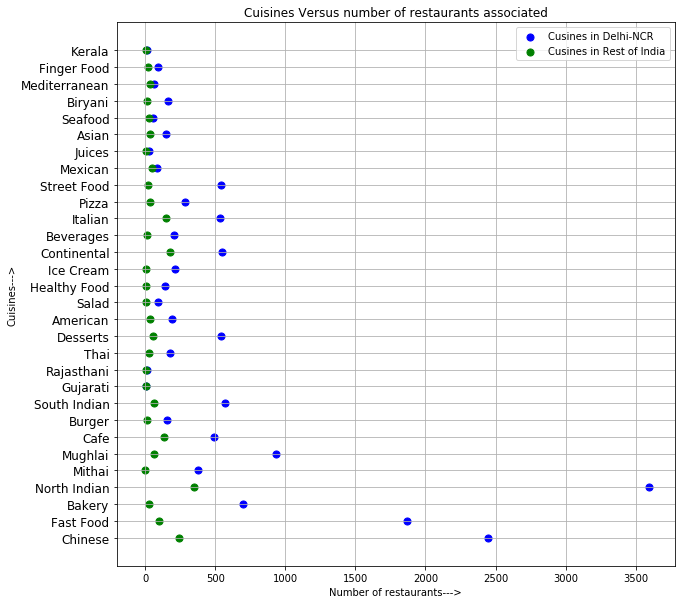

In [32]:
cusi = []
inside_delhi = []
inside_others = []
for i in dic_delhi.keys():
    if i in dic_other:
        cusi.append(i)
        inside_delhi.append(dic_delhi[i])
        inside_others.append(dic_other[i])
plt.figure(figsize=(10, 10))
plt.scatter(inside_delhi[0:30], cusi[0:30], c='blue', s=50)
plt.scatter(inside_others[0:30], cusi[0:30], c='green', s=50)
plt.yticks(size=12)
plt.grid()
plt.xlabel('Number of restaurants--->')
plt.ylabel('Cuisines--->')
plt.title('Cuisines Versus number of restaurants associated')
plt.legend(['Cusines in Delhi-NCR', 'Cusines in Rest of India'])
plt.show()

#### 4.Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable     graph to explain your inference.

From the above graph we can infer that "North Indian" cusinie is the most popular among restaurants of Delhi_NCR as well as other states. Here I have plotted only those 30 important cusinies which are common in both Delhi-NCR and other states. There are some cusinies present in other states and are not present in any restaurant of Delhi-NCR. After North Indian cusinie we have chinese cusinie with 2448 restaurants in Delhi-NCR and 242 in other states of india. After these two we have fast food with 1866 restaurants in Delhi_NCR and 97 in other states(a huge difference). After this we have Mughlai cusinie in Delhi-NCR with 933 restaurants and 59 in the states other than Delhi-NCR. and there are many more cusinies as show in the graph.

### 2. User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.
    1.Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable         graph to explain your inference.
    
        1.Number of Votes given Restaurant
        
        2.Restaurant serving more number of cuisines.
        
        3.Average Cost of Restaurant
        
        4.Restaurant serving some specific cuisines.
        
    1.Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant     rating?
    
        1.Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [33]:
df = pd.read_csv('zomato.csv', encoding='ISO-8859-1')

####  1.Number of Votes given Restaurant

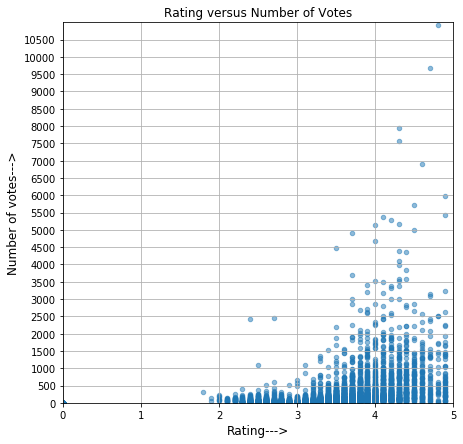

In [34]:
plt.figure(figsize=(7, 7))
plt.scatter(df['Aggregate rating'], df['Votes'], s=20, alpha=0.5)
plt.yticks(np.arange(0, 11000, 500))
plt.axis([0, 5, 0, 11000])
plt.xlabel('Rating--->', size=12)
plt.ylabel('Number of votes--->', size=12)
plt.title('Rating versus Number of Votes')
plt.grid()
plt.show()

Clearly as the number of votes increases the chances of getting higher ratings also increases. It is clear from the graph that any restaurants with more than 5000 votes get ratings between 4 and 5. when the voes are less than 2000, there is a diversity of ratings, which varies from 2 to 5. so for a restaurant to have a probability of getting higher aggregate rating, it should have more than 5000 votes. Also there are many restaurants having votes between between 1000 and 2000 with very good ratings, that is between 4 and 5.

#### 2.Restaurant serving more number of cuisines.

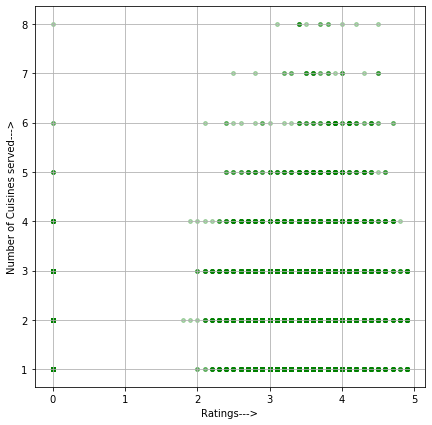

number of cuisines served=  3 , number of restaurants serving given number of cuisines=  1840
number of cuisines served=  1 , number of restaurants serving given number of cuisines=  3394
number of cuisines served=  4 , number of restaurants serving given number of cuisines=  584
number of cuisines served=  2 , number of restaurants serving given number of cuisines=  3444
number of cuisines served=  5 , number of restaurants serving given number of cuisines=  164
number of cuisines served=  6 , number of restaurants serving given number of cuisines=  74
number of cuisines served=  7 , number of restaurants serving given number of cuisines=  28
number of cuisines served=  8 , number of restaurants serving given number of cuisines=  14


In [35]:
df=df.loc[df.Cuisines.notnull()]
cuisines=[len(i.split(',')) for i in df.Cuisines]
rating=[i for i in df['Aggregate rating']]
plt.figure(figsize=(7, 7))
plt.scatter(rating, cuisines, c='green', s=15, alpha=0.3)
plt.xlabel('Ratings--->')
plt.ylabel('Number of Cuisines served--->')
plt.grid()
plt.show()
dic=dict()
for i in cuisines:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
for i in dic.keys():
    print("number of cuisines served= ", i, ", number of restaurants serving given number of cuisines= ", dic[i])

From the graph itself, it is clear that when the number of cuisines provided increases from 3 to 8, generally the rating seems to converge between 3 and 4. restaurants providing more number of cuisines are not much likely to get higher ratings, specially when the number of cuisines provided exceeds 6. while if the restaurants provide less number of cuisines, for example 1 or 2 cuisines, they are more likely to get higher ratings. Infact many restaurants in india are providing 2 cuisines. there is a very less number of restaurants providing 8 cuisines. it seems like when a restaurant provides too many cuisines, its focus on the quality of food offered diverges. while restaurants providing less cuisines focus on the quality of food to get good aggregate ratings.

#### 3.Average Cost of Restaurant

<Figure size 504x504 with 0 Axes>

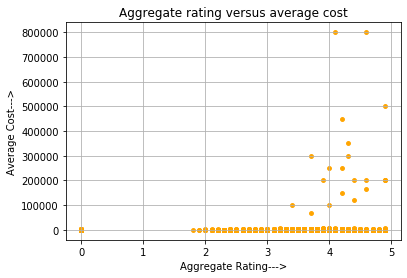

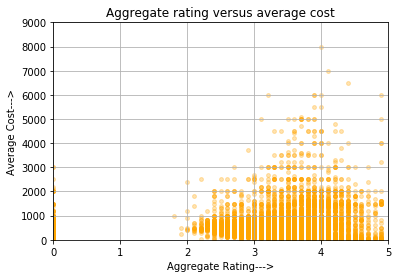

In [36]:
plt.figure(figsize=(7, 7))


plt.subplots(0, 1)
plt.scatter(df['Aggregate rating'], df['Average Cost for two'], s=15, c='orange')
plt.grid()
plt.xlabel('Aggregate Rating--->')
plt.ylabel('Average Cost--->')
plt.title('Aggregate rating versus average cost')
plt.show()


plt.subplots(0, 2)
plt.scatter(df['Aggregate rating'], df['Average Cost for two'], s=15, c='orange', alpha=0.3)
plt.grid()
plt.axis([0, 5, 0, 9000])
plt.xlabel('Aggregate Rating--->')
plt.ylabel('Average Cost--->')
plt.title('Aggregate rating versus average cost')
plt.show()

In the first subplot we can see that when the average cost goes higher than 1 lakh the rating is generally between 4 and 5, and ofcourse it sholud be like that only, because when the average cost is too high itself, the food quality should also be at its peak.This subplot dosen't give us much details about the variation of rating with the average cost. The second subplot is made by narrowing the range of average cost for two.As the average cost goes in between 2000, to 6000, it seems like the food is not worth the money because in that case the average rating is generally between 3 and 4. whereas when the average cost is between 1000 to 2000, the rating varies from 3 to 4.5 mostly. But for the higher price ranges the rating is between 3 and 4.

#### 4.Restaurant serving some specific cuisines.

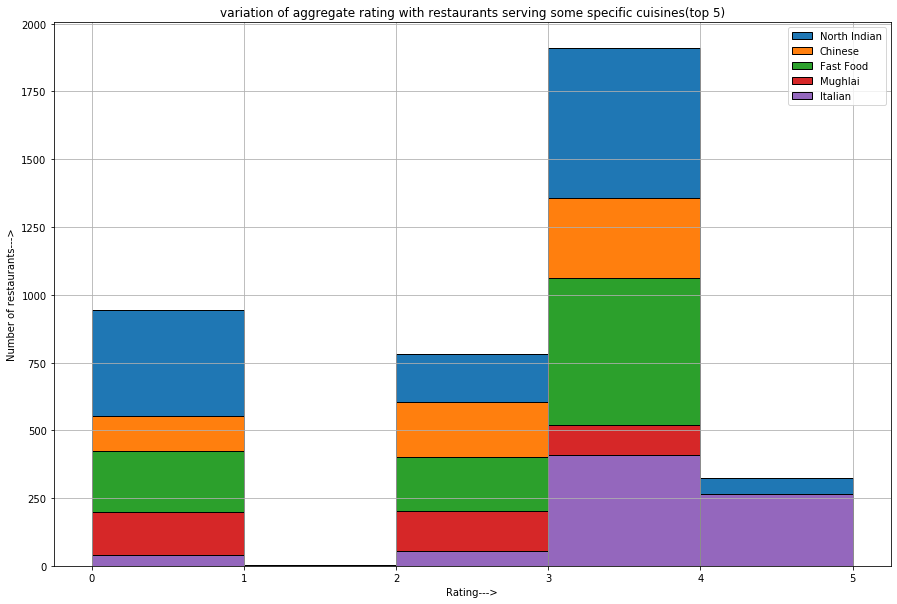

In [37]:
df = pd.read_csv('zomato.csv', encoding='ISO-8859-1')
df = df.loc[df.Cuisines.notnull()]
cuisines=[]
for i in df.Cuisines:
    for j in i.split(','):
        cuisines.append(j)
dic=dict()
for i in cuisines:
    if i.strip() in dic.keys():
        dic[i.strip()]+=1
    else:
        dic[i.strip()]=1
cus=np.array([i for i in dic.keys()])
freq=np.array([i for i in dic.values()])

cus=cus[np.argsort(freq)][::-1]
freq=freq[np.argsort(freq)][::-1]
popular_cuisines=cus[:5]
plt.figure(figsize=(15, 10))
for i in popular_cuisines:
    rating=[]
    for j, k in zip(df.Cuisines, df['Aggregate rating']):
        if i in j:
            rating.append(k)
    plt.hist(rating, edgecolor='black', bins=[0, 1, 2, 3, 4, 5])
    plt.xlabel('Rating--->')
    plt.ylabel('Number of restaurants--->')
    plt.title('variation of aggregate rating with restaurants serving some specific cuisines(top 5)')
plt.grid()
plt.legend(labels=popular_cuisines)
plt.show()

From the above histrogram plot, it is clear that North indian cuisinie is the best rated among all the cuisinies in all the aggregate ranges. After it comes the chinese cuisinie, it is rated between 3 to 4 maximum number of times. Then we have Fast Food, which has been rated between 3 to 4 stars maximum number of times.after these comes mughlai and italian cuisines.it seems like people like the italian cuisinie very much because it has a considerable rating between 3 to 4 and 4 to 5 also.

#### 1.Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant     rating?

    1.Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [38]:
df = pd.read_csv('zomato.csv', encoding='ISO-8859-1')
np_rating=np.array([i for i in df['Aggregate rating']])
np_votes=np.array([i for i in df['Votes']])
np_locality=np.array([i for i in df['Locality']])
dic=dict()
for i in set(np_locality):
    if sum(np_votes[np.argwhere(np_locality==i)])[0]!=0:
        dic[i]=sum((np_votes*np_rating)[np.argwhere(np_locality==i)])[0]/sum(np_votes[np.argwhere(np_locality==i)])[0]
        
np_local=np.array([i for i in dic.keys()])
np_wrr=np.array([i for i in dic.values()])
np_local=np_local[np.argsort(np_wrr)][::-1]
np_wrr=np.sort(np_wrr)[::-1]
for i in range(len(np_wrr)):
    print(np_local[i], "----->", np_wrr[i])

Cengkareng -----> 4.9
Penjaringan -----> 4.9
Bebek -----> 4.9
Beak Street, Soho -----> 4.9
Lexington Street, Soho -----> 4.9
Nassima Royal Hotel, Trade Centre Area -----> 4.9
Sofitel Philippine Plaza Manila, Pasay City -----> 4.9
Marshalltown -----> 4.9
Old Dutch Hospital, Fort -----> 4.9
Gíçvea -----> 4.9
Hotel Clarks Amer, Malviya Nagar -----> 4.9
West Park -----> 4.9
Bishopsgate, City Of London -----> 4.9
Kenwood -----> 4.9
Pondok Aren -----> 4.9
Deira City Centre Area -----> 4.9
New Tampa -----> 4.9
The Milk District -----> 4.9
Aminabad -----> 4.9
DIFC -----> 4.9
Paia -----> 4.9
Fort Street -----> 4.9
Windermere -----> 4.9
Taman Impian Jaya Ancol, Ancol -----> 4.9
City and Suburban -----> 4.9
Setor De Clubes Esportivos Sul -----> 4.9
Caddebostan -----> 4.9
Barwa Towers, Al Sadd -----> 4.9
Venetian Village, Al Maqtaa -----> 4.9
Friends Colony -----> 4.886916367367881
Powai -----> 4.841868613138686
Kirlampudi Layout -----> 4.820161290322581
Deccan Gymkhana -----> 4.8
Century City Mal

Sigra -----> 3.442222222222222
Shalimar Bagh -----> 3.4363368669022383
Central Plaza Mall, Golf Course Road -----> 3.432619439868204
Ashok Vihar Phase 3 -----> 3.4311340206185563
DLF Phase 3 -----> 3.4292100584201175
Green Park -----> 3.4289429373246025
Sahara Mall, MG Road -----> 3.4271739130434784
Kalkaji -----> 3.4253289473684223
Vasant Square Mall, Vasant Kunj -----> 3.424536082474227
Unitech Infospace, Sector 21, Gurgaon -----> 3.421685508735868
Lanka -----> 3.4215297450424926
Country Inn & Suites by Carlson, Sector 12 -----> 3.4204545454545454
The Grand New Delhi, Vasant Kunj -----> 3.4202479338842977
MGF Metropolitan Mall, MG Road -----> 3.416041609635916
Hotel The Royal Plaza, Janpath -----> 3.410736842105263
Lado Sarai -----> 3.407725321888412
Asa Sul -----> 3.40625
JMD Megapolis Mall, Sohna Road -----> 3.4000000000000004
Prozone Mall, Chicalthana -----> 3.4
Bayfront Avenue, Downtown Core -----> 3.4
Sector 40 -----> 3.4
City Centre Mall, Rohini -----> 3.4
Tanjung Duren -----> 

<h1>Following are the top 10 localities with more weighted restaurant rating</h1>
<li>Marshalltown</li>
<li>Barwa Towers, Al Sadd</li>
<li>West Park</li>
<li>New Tampa</li>
<li>The Milk District</li>
<li>Taman Impian Jaya Ancol, Ancol</li>
<li>DIFC</li>
<li>City and Suburban</li>
<li>Pondok Aren</li>
<li>Cengkareng</li>

### 3.Visualization
1.Plot the bar graph top 15 restaurants have a maximum number of outlets.

2.Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

3.Plot the bar graph top 10 restaurants in the data with the highest number of votes.

4.Plot the pie graph of top 10 cuisines present in restaurants in the USA.

5.Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

#### 1.Plot the bar graph top 15 restaurants have a maximum number of outlets.

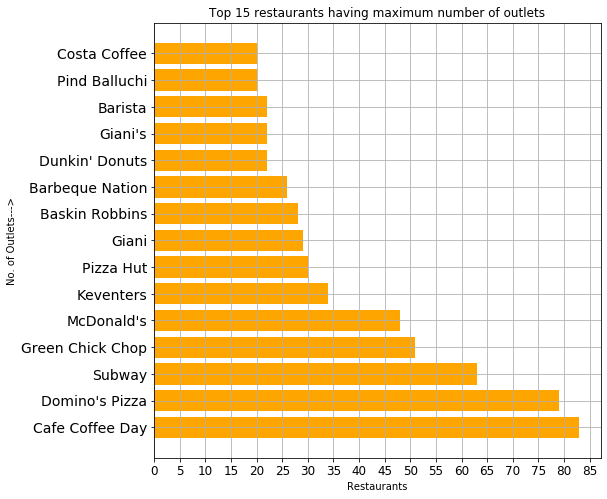

In [39]:
df = pd.read_csv('zomato.csv', encoding='ISO-8859-1')

dic=dict()

for i in df['Restaurant Name']:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1

np_names=np.array([i for i in dic.keys()])
np_freq=np.array([i for i in dic.values()])
np_names=np_names[np.argsort(np_freq)][::-1]
np_freq=np_freq[np.argsort(np_freq)][::-1]

plt.figure(figsize=(8, 8))
plt.barh(np_names[0:15], np_freq[0:15], color='orange')
plt.grid()
plt.ylabel('No. of Outlets--->')
plt.xlabel('Restaurants')
plt.title('Top 15 restaurants having maximum number of outlets')
plt.xticks(np.arange(0, 90, 5), size=12)
plt.yticks(size=14)
plt.show()

#### 2.Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

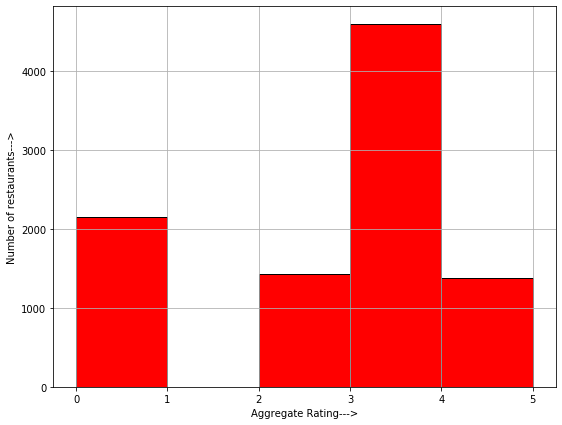

In [40]:
x=df['Aggregate rating'].dropna()
plt.figure(figsize=(9, 7))
plt.xticks(range(6))
plt.xlabel('Aggregate Rating--->')
plt.ylabel('Number of restaurants--->')
plt.hist(x, color='red', edgecolor='black', bins=range(6))

plt.grid()
plt.show()

#### 3.Plot the bar graph top 10 restaurants in the data with the highest number of votes.

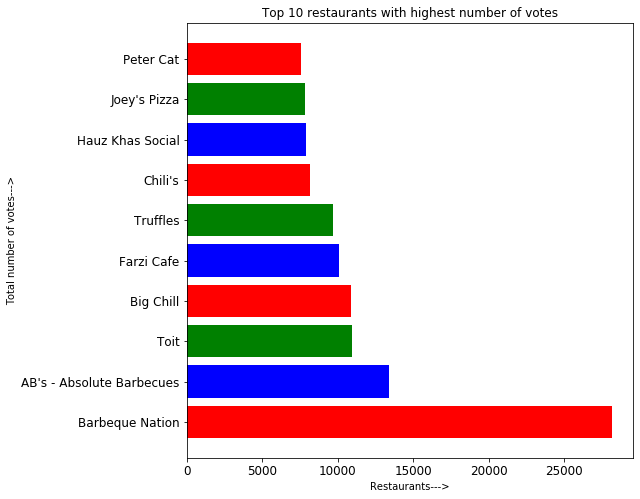

In [41]:
np_restaurants=np.array([i for i in df['Restaurant Name']])
np_votes=np.array([i for i in df['Votes']])

dic=dict()

for i in range(len(np_restaurants)):
    if np_restaurants[i] in dic.keys():
        dic[np_restaurants[i]]+=np_votes[i]
    else:
        dic[np_restaurants[i]]=np_votes[i]

np_r=np.array([i for i in dic.keys()])
np_v=np.array([i for i in dic.values()])
np_r=np_r[np.argsort(np_v)][::-1]
np_v=np_v[np.argsort(np_v)][::-1]


plt.figure(figsize=(8, 8))
plt.barh(np_r[0:10], np_v[0:10], color='rbg')
plt.xlabel('Restaurants--->')
plt.ylabel('Total number of votes--->')
plt.title('Top 10 restaurants with highest number of votes')
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

#### 4.Plot the pie graph of top 10 cuisines present in restaurants in the USA.

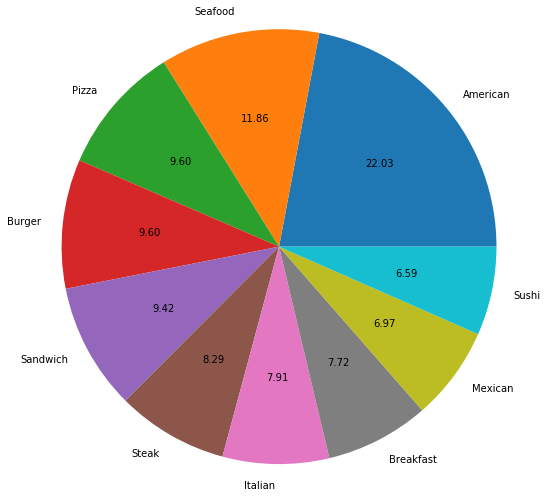

In [42]:
df=df.loc[df['Cuisines'].notnull()]
df=df.loc[df['Currency']=='Dollar($)']

cus=[]
for i in df.Cuisines:
    for j in i.split(','):
        cus.append(j.strip())
dic=dict()
for i in cus:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1

np_cuisines=np.array([i for i in dic.keys()])
np_freq=np.array([i for i in dic.values()])
np_cuisines=np_cuisines[np.argsort(np_freq)][::-1]
np_freq=np.sort(np_freq)[::-1]

plt.pie(np_freq[0:10], labels=np_cuisines[0:10], radius=2.5, autopct='%.2f')
plt.show()

#### 5.Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

<Figure size 432x288 with 0 Axes>

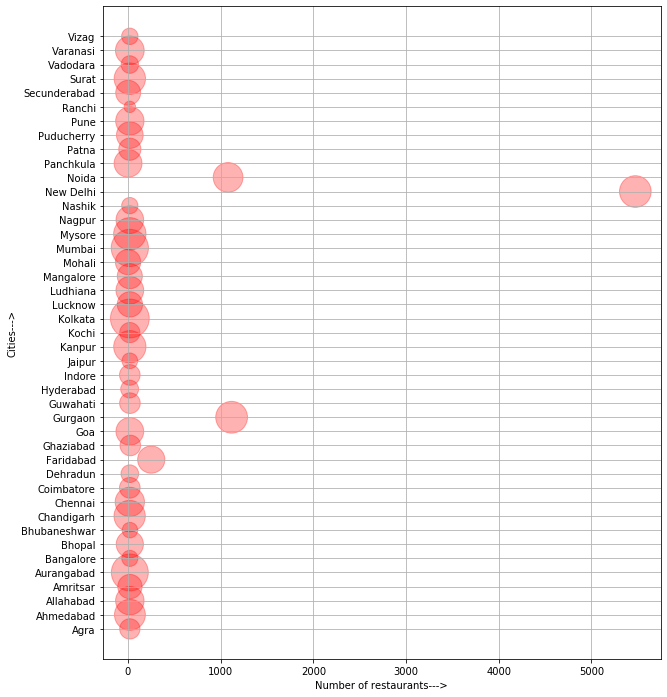

<Figure size 432x288 with 0 Axes>

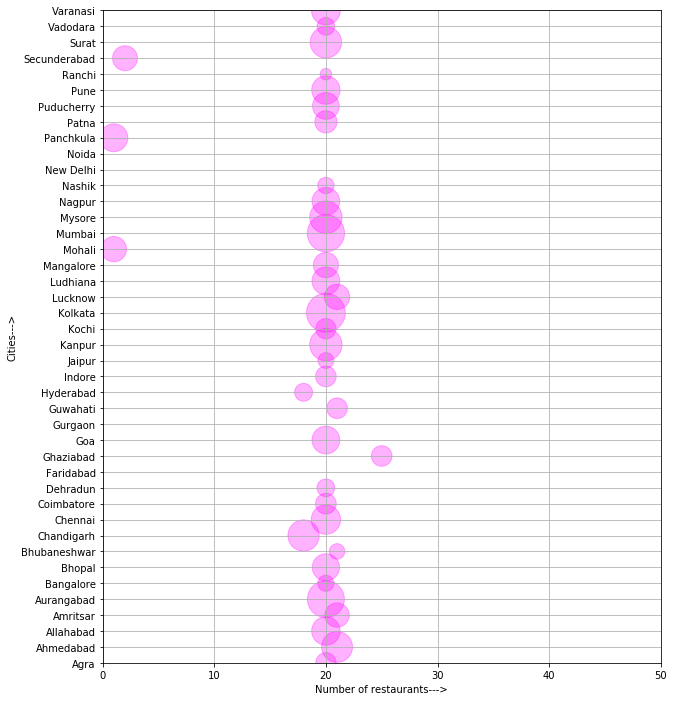

In [43]:
df = pd.read_csv('zomato.csv', encoding='ISO-8859-1')
df = df.loc[df.Currency=='Indian Rupees(Rs.)']

np_rating=np.array([i for i in df['Aggregate rating']])
np_votes=np.array([i for i in df['Votes']])
np_city=np.array([i for i in df['City']])
dic=dict()
for i in set(np_city):
    if sum(np_votes[np.argwhere(np_city==i)])[0]!=0:
        dic[i]=sum((np_votes*np_rating)[np.argwhere(np_city==i)])[0]/sum(np_votes[np.argwhere(np_city==i)])[0]
dic1=dict()

for i in np_city:
    if i in dic1.keys():
        dic1[i]+=1
    else:
        dic1[i]=1


size=[]
for i in dic:
    size.append(dic[i])
        

plt.subplots(0, 2)
plt.figure(figsize=(10, 12))
plt.scatter(dic1.values(), dic1.keys(), s=5**np.array(size), alpha=0.3, c='red')
plt.xlabel('Number of restaurants--->')
plt.ylabel('Cities--->')
plt.grid()
plt.show()



plt.subplots(0, 1)
plt.figure(figsize=(10, 12))
plt.scatter(dic1.values(), dic1.keys(), s=5**np.array(size), alpha=0.3, c='magenta')
plt.xlabel('Number of restaurants--->')
plt.ylabel('Cities--->')
plt.axis([0, 50, 'Agra', 'Varanasi'])
plt.grid()
plt.show()